Let's start this hands-on tutorial defining what is the programming language and the packages we will use during this course. 

You need to install Python (if you want to use this programming language for your final project). In order to install packages (or modules) you will use PIP. PIP is a package manager for Python packages. Each package can be installed as follows: _pip install \<name_of_package\>_.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import *

import ccxt

import matplotlib.pyplot as plt
import mplfinance as mpf

Let's now download the dataset from the Moodle webpage and let's see how to upload the files.

In [3]:
pair = 'BTC/USD'
pair = pair.replace('/', '-')

In [4]:
df = pd.read_csv(f'../data_download/data/data_{pair}.csv')

Let's start by exploring how this dastaset is formed. Let's print the first and last five rows of the dataset. The number of rows to be printed is a variable value which can be set by the user.

In [5]:
df.head(5)

,Time,Open,High,Low,Close,Volume
0,2021-12-25 00:00:00,50796.0,50807.0,50566.0,50670.0,2.293749e+06
1,2021-12-25 00:05:00,50670.0,50783.0,50669.0,50741.0,2.025913e+06
2,2021-12-25 00:10:00,50741.0,50741.0,50535.0,50582.0,2.897014e+06
3,2021-12-25 00:15:00,50582.0,50681.0,50521.0,50681.0,1.785521e+06
4,2021-12-25 00:20:00,50681.0,50767.0,50652.0,50756.0,1.062458e+06


In [6]:
df.tail(5)

,Time,Open,High,Low,Close,Volume
2587,2022-01-02 23:35:00,47239.0,47406.0,47213.0,47315.0,1.185534e+06
2588,2022-01-02 23:40:00,47315.0,47394.0,47315.0,47394.0,3.286963e+05
2589,2022-01-02 23:45:00,47394.0,47394.0,47299.0,47300.0,4.014382e+05
2590,2022-01-02 23:50:00,47300.0,47300.0,47248.0,47284.0,1.202602e+06
2591,2022-01-02 23:55:00,47284.0,47316.0,47252.0,47276.0,6.784927e+05


At this point we already know the names of the columns in the dataset. Let's formalize this first step of exploration as follows.

In [7]:
df.columns

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

As you know we will work with time-series. The main ingredient is the time. We need the _time_ column to be in a specific format (the _datetime_ format) which allows us to perform operations over time (grouping, selection...). Let's check the type of the columns in our dataset.

In [8]:
df.dtypes

Time       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

The _object_ type does not allows to performe the above mentioned operations over the _time_ column. We need to modify the time of this column.

In [9]:
df.Time = pd.to_datetime(df.Time)

Let's now set this column as an index column. This step will give us the possibility to perform the above mentioned operations in an easier way.

In [10]:
df.set_index(df.Time, inplace=True)

We are now ready to perform the first, foundamental exploratory analysis on our dataset. Be careful, this can be considered a mandatory step and it will contain summary informations about the whole dataset.

In [11]:
df.describe()

,Open,High,Low,Close,Volume
count,2592.000000,2592.000000,2592.000000,2592.000000,2.592000e+03
mean,48607.901813,48655.971451,48555.786265,48606.484761,1.421996e+06
std,1659.866985,1655.725433,1663.525372,1659.506498,1.554677e+06
min,45710.000000,45872.000000,45650.000000,45711.000000,0.000000e+00
25%,47208.750000,47258.750000,47158.000000,47208.750000,5.757432e+05
50%,47835.500000,47881.000000,47778.500000,47835.500000,9.718186e+05
75%,50394.250000,50451.750000,50354.500000,50392.500000,1.737342e+06
max,51960.000000,52129.000000,51900.000000,51959.000000,2.576473e+07


Let's plot the closing price.

(array([18986., 18987., 18988., 18989., 18990., 18991., 18992., 18993.,
        18994., 18995.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

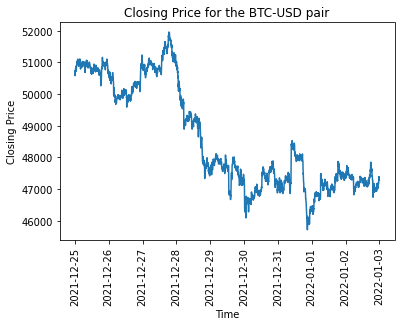

In [12]:
plt.plot(df.Close)
plt.title(f'Closing Price for the {pair} pair')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)

Remember, it is foundamental for the project to well define the axis labels and to give a title to the plot. This figure shows that the price is non-stationary. Roughly speaking the existence of strong seasonalities confirms the previous assertion.

In order to work with stationary data we want to trasform prices in returns. Roughly speaking, the return can be thought as the percentage change between the current and a prior element. There are several ways to compute the return. Let's start with the implementation of the formula seen in class.

In [13]:
closing_prices = df.Close

In [14]:
rets = (closing_prices[1:].values / closing_prices[:-1]) - 1
print(rets.head(5))

Time
2021-12-25 00:00:00    0.001401
2021-12-25 00:05:00   -0.003134
2021-12-25 00:10:00    0.001957
2021-12-25 00:15:00    0.001480
2021-12-25 00:20:00    0.000059
Name: Close, dtype: float64


We don't need to compute returns by hand. We can use functions made available by the above described libraries.

In [15]:
returns = closing_prices.pct_change()
print(returns)

Time
2021-12-25 00:00:00         NaN
2021-12-25 00:05:00    0.001401
2021-12-25 00:10:00   -0.003134
2021-12-25 00:15:00    0.001957
2021-12-25 00:20:00    0.001480
                         ...   
2022-01-02 23:35:00    0.001609
2022-01-02 23:40:00    0.001670
2022-01-02 23:45:00   -0.001983
2022-01-02 23:50:00   -0.000338
2022-01-02 23:55:00   -0.000169
Name: Close, Length: 2592, dtype: float64


In this case we can also specify the period at which we want to compute returns.

In [16]:
returns = closing_prices.pct_change(2)
print(returns)

Time
2021-12-25 00:00:00         NaN
2021-12-25 00:05:00         NaN
2021-12-25 00:10:00   -0.001737
2021-12-25 00:15:00   -0.001182
2021-12-25 00:20:00    0.003440
                         ...   
2022-01-02 23:35:00    0.003180
2022-01-02 23:40:00    0.003281
2022-01-02 23:45:00   -0.000317
2022-01-02 23:50:00   -0.002321
2022-01-02 23:55:00   -0.000507
Name: Close, Length: 2592, dtype: float64


Let's go back to time 1 and let's remove the null values.

In [17]:
returns = closing_prices.pct_change().dropna()
print(returns)

Time
2021-12-25 00:05:00    0.001401
2021-12-25 00:10:00   -0.003134
2021-12-25 00:15:00    0.001957
2021-12-25 00:20:00    0.001480
2021-12-25 00:25:00    0.000059
                         ...   
2022-01-02 23:35:00    0.001609
2022-01-02 23:40:00    0.001670
2022-01-02 23:45:00   -0.001983
2022-01-02 23:50:00   -0.000338
2022-01-02 23:55:00   -0.000169
Name: Close, Length: 2591, dtype: float64


(array([18986., 18987., 18988., 18989., 18990., 18991., 18992., 18993.,
        18994., 18995.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

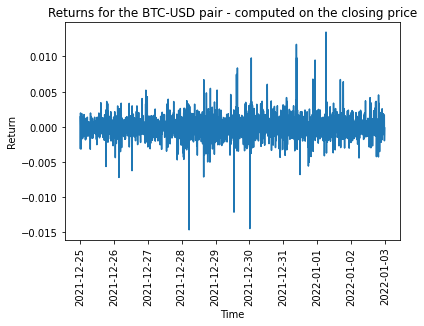

In [18]:
plt.plot(returns)
plt.title(f'Returns for the {pair} pair - computed on the closing price')
plt.xlabel('Time')
plt.ylabel('Return')
plt.xticks(rotation=90)

Let's now switch to log-returns. 

In [19]:
print(closing_prices.head(3))
print(closing_prices.shift(1).head(3))

Time
2021-12-25 00:00:00    50670.0
2021-12-25 00:05:00    50741.0
2021-12-25 00:10:00    50582.0
Name: Close, dtype: float64
Time
2021-12-25 00:00:00        NaN
2021-12-25 00:05:00    50670.0
2021-12-25 00:10:00    50741.0
Name: Close, dtype: float64


In [20]:
log_rets = np.log(closing_prices) - np.log(closing_prices.shift(1))
print(log_rets)

Time
2021-12-25 00:00:00         NaN
2021-12-25 00:05:00    0.001400
2021-12-25 00:10:00   -0.003138
2021-12-25 00:15:00    0.001955
2021-12-25 00:20:00    0.001479
                         ...   
2022-01-02 23:35:00    0.001608
2022-01-02 23:40:00    0.001668
2022-01-02 23:45:00   -0.001985
2022-01-02 23:50:00   -0.000338
2022-01-02 23:55:00   -0.000169
Name: Close, Length: 2592, dtype: float64


In [21]:
log_rets.dropna(inplace=True)
print(log_rets)

Time
2021-12-25 00:05:00    0.001400
2021-12-25 00:10:00   -0.003138
2021-12-25 00:15:00    0.001955
2021-12-25 00:20:00    0.001479
2021-12-25 00:25:00    0.000059
                         ...   
2022-01-02 23:35:00    0.001608
2022-01-02 23:40:00    0.001668
2022-01-02 23:45:00   -0.001985
2022-01-02 23:50:00   -0.000338
2022-01-02 23:55:00   -0.000169
Name: Close, Length: 2591, dtype: float64


(array([18986., 18987., 18988., 18989., 18990., 18991., 18992., 18993.,
        18994., 18995.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

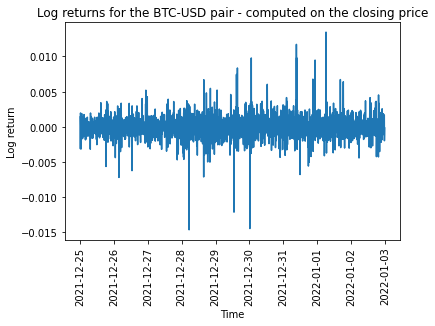

In [22]:
plt.plot(returns)
plt.title(f'Log returns for the {pair} pair - computed on the closing price')
plt.xlabel('Time')
plt.ylabel('Log return')
plt.xticks(rotation=90)

Also in this case an alternative formula exists for the log rets computation. Also in this case we will use functions from python library in order to compute them.

In [23]:
print(np.log(1 + closing_prices.pct_change()).dropna())

Time
2021-12-25 00:05:00    0.001400
2021-12-25 00:10:00   -0.003138
2021-12-25 00:15:00    0.001955
2021-12-25 00:20:00    0.001479
2021-12-25 00:25:00    0.000059
                         ...   
2022-01-02 23:35:00    0.001608
2022-01-02 23:40:00    0.001668
2022-01-02 23:45:00   -0.001985
2022-01-02 23:50:00   -0.000338
2022-01-02 23:55:00   -0.000169
Name: Close, Length: 2591, dtype: float64


Let's now plot the histogram of the log returns. It is a discretization of the distribution.

Text(0, 0.5, 'Frequency')

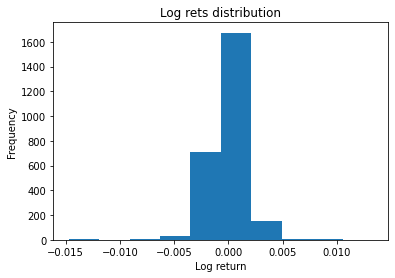

In [24]:
plt.hist(log_rets)
plt.title('Log rets distribution')
plt.xlabel('Log return')
plt.ylabel('Frequency')

We can control the number of bins in which the values should be disretized.

Text(0, 0.5, 'Frequency')

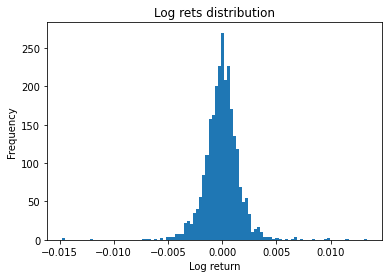

In [25]:
plt.hist(log_rets, bins=100)
plt.title('Log rets distribution')
plt.xlabel('Log return')
plt.ylabel('Frequency')

Let's now start with the moments. Let's start with the mean.

In [26]:
def mean(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    return mean

In [27]:
mean(log_rets)

-2.675849183242901e-05

Let's now analyze the variance.

In [28]:
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance

In [29]:
variance(log_rets)

2.586877430833101e-06

Cklearly we don't need to write all the functions by hand. Let's see a scipy function that gives us all the moments of the distribution.

In [30]:
moments = describe(log_rets)
print(moments)

DescribeResult(nobs=2591, minmax=(-0.01473450236110807, 0.013345554247722546), mean=-2.675849183242901e-05, variance=2.587876225207937e-06, skewness=-0.13218306426271942, kurtosis=11.69318867216526)


It is also possible to compute the central moments.

In [31]:
central_moments = moment(log_rets,  moment=2)
print(central_moments)

2.5868774308330982e-06


Text(0, 0.5, 'Frequency')

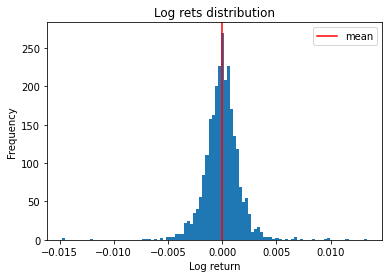

In [32]:
plt.hist(log_rets, bins=100)
plt.axvline(mean(log_rets), color='red', label='mean')
plt.title('Log rets distribution')
plt.legend()
plt.xlabel('Log return')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

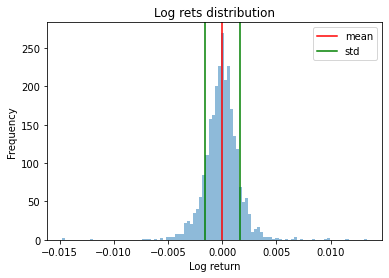

In [33]:
plt.hist(log_rets, bins=100, alpha=0.5)
plt.axvline(mean(log_rets), color='red', label='mean')
plt.axvline(np.sqrt(variance(log_rets)), color='green', label='std')
plt.axvline(-np.sqrt(variance(log_rets)), color='green')
plt.title('Log rets distribution')
plt.legend()
plt.xlabel('Log return')
plt.ylabel('Frequency')

## This is an additional part that they should do by their own

Let's start by computing the quantiles. Quantiles are the set of values/points that divides the dataset into groups of equal size. 

In [34]:
print(np.quantile(log_rets, q = np.arange(0.33, 1, 0.33)))  

[-0.00053921  0.00049243  0.00367953]


In [35]:
print(np.quantile(log_rets, q = np.arange(0.25, 1, 0.25)))  

[-8.61785121e-04 -2.08726870e-05  8.03774588e-04]


In [36]:
print(np.median(log_rets))  

-2.087268704720202e-05


Let's now try to write the function to obtain the skewness.

In [49]:
def skew(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Deviations
    deviations = [(x - mean) ** 3 for x in data]
    # Skew
    skew = sum(deviations) / (n * np.sqrt(variance(log_rets))**3)
    return skew

In [50]:
skew(log_rets)

-0.1321830642627182

In [51]:
def kurt(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Deviations
    deviations = [(x - mean) ** 4 for x in data]
    # Kurt
    kurt = sum(deviations) / (n * np.sqrt(variance(log_rets))**4)
    return kurt

In [52]:
kurt(log_rets)

14.693188672165247

## Additional graphical part

Before starting the group work, let's see another graphical library to plot OHLCV data.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


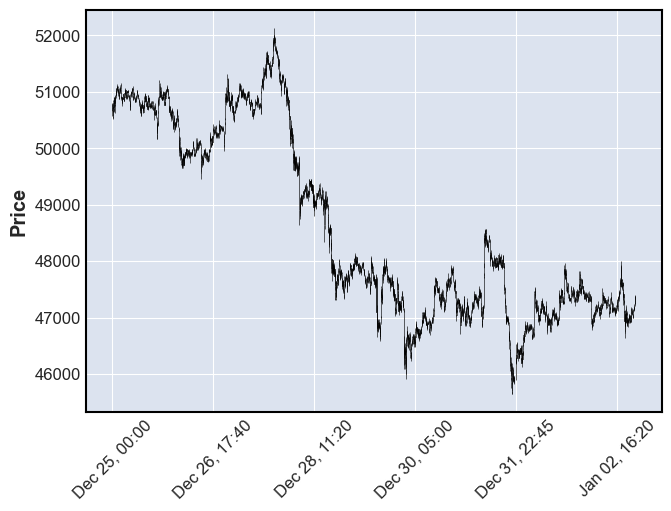

In [55]:
mpf.plot(df,type='candle')

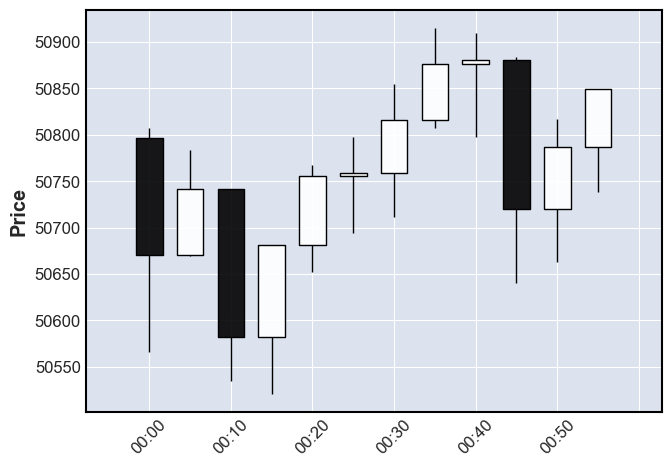

In [56]:
mpf.plot(df.iloc[:12, :],type='candle')

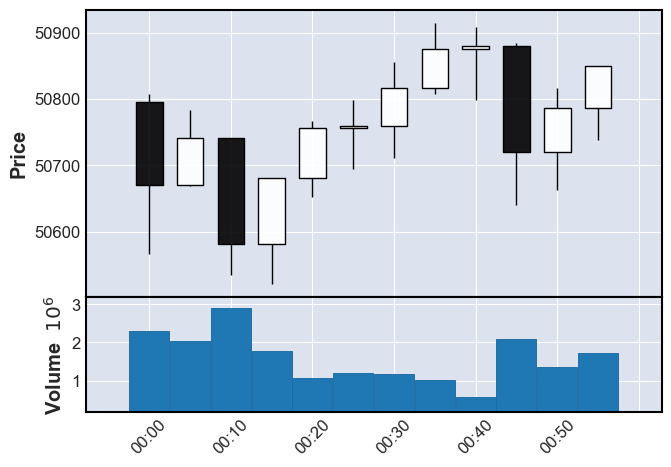

In [57]:
mpf.plot(df.iloc[:12, :],type='candle', volume=True)